# Deep Learning

## HW1- Problem 3 - Regression (100 pts)

### Please fill this part


1.   Full Name: Aliasghar Pourghani
2.   Student Number: 98101299


*You are just allowded to change those parts that start with "TO DO". Please do not change other parts.*

*It is highly recommended to read each codeline carefully and try to understand what it exactly does. Best of luck and have fun!*

In [17]:
# You are not allowed to import other packages.

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

### Part1:
Consider the dataset which has been given to you. Split the dataset into the `training dataset` and `test dataset`. You can use `80%` of the data for training and the rest for testing.

In [60]:
dataset = pd.read_csv("./data/data01.csv")

# implement the split part
# name them: x_train, x_test, y_train, y_test


x_train = dataset.iloc[:int(len(dataset) * 0.8),1]
y_train = dataset.iloc[:int(len(dataset) * 0.8),2]

x_test = dataset.iloc[int(len(dataset) * 0.8):,1]
y_test = dataset.iloc[int(len(dataset) * 0.8):,2]

In [61]:
x_test

400    1.341365
401    0.907631
402    1.714859
403    0.927711
404    0.951807
         ...   
495    1.907631
496    1.706827
497    0.092369
498    1.084337
499    0.493976
Name: X, Length: 100, dtype: float64

### Part2:
Assume there is simple linear relationship between X and Y. Train a simple `Linear Regression` on the training dataset and report its accuracy on the training and testing dataset, separately.

In [62]:
# here you can implement via sgd or use least square solution. we suggest the second one inv(A^T A) * A^T y.
# consider m as the returned line --> m[0] = the slope , m[1] = y intercept, also don't forget to use numpy for calculating m.
m = [0,0]
A = np.vstack([x_train.to_numpy(), np.ones(len(x_train.to_numpy()))]).T
m[0], m[1] = np.linalg.lstsq(A, y_train.to_numpy(), rcond=None)[0]
print(m)

[-1.0264173819380167, 0.815006340960262]


In [63]:
predicted_train_y = m[0] * x_train + m[1]
predicted_test_y = m[0] * x_test + m[1]

train_error = mean_squared_error(y_train,predicted_train_y)
test_error = mean_squared_error(y_test,predicted_test_y)

print(f"MSE train error: {train_error}\nMSE test error: {test_error}")

MSE train error: 0.3246776301777423
MSE test error: 0.3544951192130029


### Part3:
Draw the line you've found in the last part, on train and test points (each separately).

Text(0.5, 1.0, 'Train dataset')

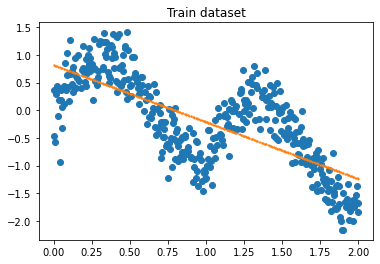

In [64]:
plt.scatter(x_train, y_train)
plt.scatter(x_train, m[0]*x_train + m[1], s=1)
plt.title("Train dataset")

Text(0.5, 1.0, 'Test dataset')

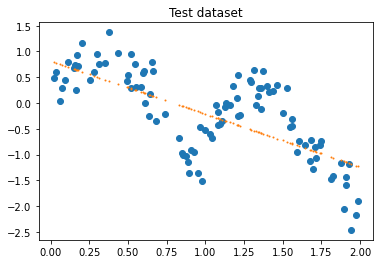

In [65]:
plt.scatter(x_test, y_test)
plt.scatter(x_test, m[0]*x_test + m[1], s=1)
plt.title("Test dataset")

### Part4:
Were the reported accuracies acceptable?

What about the line you drew in the last part?

Was it appropriate for the dataset?
<br><br/>
Explain what are the main problems here.

No, the dataset is non-linear and cannot be approximated with a straight line, hence error is high.
therefore we should use other methods like Locally Weighted Linear Regression.


### Part5:
Now, consider the `Locally Weighted Linear Regression` approach for this problem. Do expect it performs better than simple `Linear Regression` for this dataset?

Yes, beacause

### Part6:
Here, we want to implement the `suggested model`. You can implement any weight function you want, the below implementation is just a sample:
<br><br/>
\begin{equation*}
    w^{(i)}=exp\left(-\frac{(\mathbf x^{(i)}-\mathbf x)^\top(\mathbf x^{(i)}-\mathbf x)}{2\tau^2}\right)
\end{equation*}

In [66]:
def get_weight_matrix(the_query_point, train_dataset, hyperparameter):
    l = train_dataset.shape[0]
    W = np.mat(np.eye(l))
    for i, xi in enumerate(train_dataset):
        W[i, i] = np.exp((-np.linalg.norm(the_query_point - xi) ** 2)/(2 * hyperparameter ** 2))
    return W

Now implement the `closed form solution` based on the following formula:
<br><br/>
\begin{equation*}
    \boldsymbol\theta=(X^\top WX)^{-1}(X^\top WY)
\end{equation*}
<br><br/>
Of course if you use another form, implement your own.

In [67]:
def predict(train_X, train_Y, query_x, hyperparameter):
    l = train_X.shape[0]
    train_X = np.reshape(train_X,(-1,1))
    X = np.hstack((train_X, np.ones((l, 1))))
    qx = np.mat([query_x, 1], dtype=object)
    W = get_weight_matrix(qx, X, hyperparameter)
    train_Y = np.reshape(train_Y,(400,1))
    theta = np.linalg.inv((X.T@W@X))@(X.T@W@train_Y)

    return np.dot(qx, theta)

### Part7:
Report accuracy of this model on the test dataset. Also, draw a plot that contains (x_test, y_test) pairs and (x_test, predicted_y) pairs that differ in color.

In [68]:
hyperparameter = 0.1

predicted_test = [predict(x_train.to_numpy(), y_train.to_numpy(), query, hyperparameter) for query in x_test]
predicted_test = np.reshape(predicted_test,(-1,))
error = mean_squared_error(np.array(y_test),predicted_test)
print(f"MSE test error: {error}")

MSE test error: 0.10590729682859713


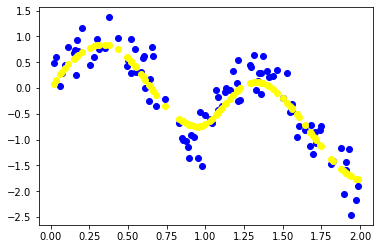

In [69]:
plt.scatter(x_test, y_test, c="blue")
plt.scatter(x_test, predicted_test, c="yellow")

### Part8:
Is the performance of the new model better than the previous one? `Explain`.

Yes, because this model can capture nonlinearities. actually this method approximates local points with a line, and in big picture, it can fit nonlinear patterns.

### Part9:
Now, we want to consider the `KNN` approach for this problem; Do you think it will perform well?

Intuition behind KNN is similar with locally weighted regression, because both of them use local points to predict the result.
Therefore we expect their results to be similar.

### Part10:
Implementing the `KNN model`.

In [70]:
class KNN:
    def __init__(self, number_neighbours, X, Y):
        self.k = number_neighbours
        self.X = X
        self.Y = Y

    def distance(self, x1, x2):
        distance = np.absolute(x1-x2)
        return distance

    def return_nn_ids(self, x):
        unsorted_distances = np.array([])
        for point in self.X:
            unsorted_distances = np.append(unsorted_distances,self.distance(point,x))
        sort_index = np.argsort(unsorted_distances)
        indices = sort_index[:self.k]
        return indices
    def predict(self, x):
        
        neareest_indices = self.return_nn_ids(x)
        predicted_y = np.mean(self.Y[neareest_indices])
        return predicted_y

In [71]:
def evaluation(k, x_train, y_train, x_test, y_test):
    model = KNN(k, x_train, y_train)
    predicted_y = [model.predict(x) for x in x_test]
    error = mean_squared_error(y_test,predicted_y)
    return error, predicted_y

In [77]:
k = range(1,50)

errors = []
    
for i in k:
        error_knn, predicted_y = evaluation(i, x_train, y_train,x_test, y_test)
        errors.append(error_knn)
        

k_opt = k[np.argmin(errors)]     

In [79]:
errors

[0.14793854960365135,
 0.11589185662650844,
 0.10301733310578777,
 0.09782237685625245,
 0.10056554154981058,
 0.10066624275213659,
 0.09709612739392579,
 0.09781301483813871,
 0.09990998014821839,
 0.1001847288363824,
 0.09852966975713562,
 0.09909696798348472,
 0.09923020173981989,
 0.09985254443069434,
 0.09964340087526026,
 0.09837610676149099,
 0.09972251278168136,
 0.09821774806132783,
 0.09687363389746836,
 0.09727283582096545,
 0.09902978208216412,
 0.09720541965177612,
 0.09697548387094207,
 0.09694732242948932,
 0.09763330933951334,
 0.09793469827961442,
 0.09732184916572778,
 0.0979422755248541,
 0.09807052814693558,
 0.097175711742371,
 0.09825840296638953,
 0.09884633681319971,
 0.09912240162306,
 0.09976204034517804,
 0.09996142687991848,
 0.09897908378028478,
 0.10011380522660886,
 0.10127435258263848,
 0.10139363485513687,
 0.10089006757483152,
 0.10126255776705928,
 0.1015377623901448,
 0.10305002251052871,
 0.1028503566116723,
 0.10348226326242953,
 0.1029727664552349

In [75]:
k = k_opt
error_knn, predicted_y = evaluation(k, x_train, y_train, x_test, y_test)
print(f"MSE error of KNN for test dataset: {error_knn}")

MSE error of KNN for test dataset: 0.09687363389746836


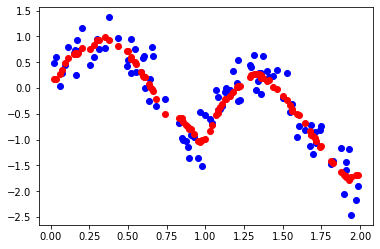

In [76]:
plt.scatter(x_test, y_test, c="blue")
plt.scatter(x_test, predicted_y, c="red")

To find best K for this algorithm we suggest to use cross-validation.
<br><br/>
Did this model perform well (due to the plot and test accuracy)?

Yes- because as we see, result can fits dataset's nonlinearity very well.